# Análise e previsão de ações usando LSTM

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# configurando estilo dos gráficos que seram gerados
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
ITUB = pd.read_csv("../input/itub-um-ano/ITUB.csv")
BBDC = pd.read_csv("../input/bbdc-um-ano/BBDC.csv")
BCSA = pd.read_csv("../input/bcsa-um-ano/BCSA.csv")

In [4]:
# criando um ticket com os códigos das ações
bank_list = ['ITUB', 'BBDC','BCSA']

In [5]:
# nomeando os bancos
company_list = [ITUB, BBDC, BCSA]
company_name = ['Itaú', 'Bradesco', 'Santander']

In [6]:
for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

In [7]:
# criando um dataframe com todos os bancos
df = pd.concat(company_list, axis=0)
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
241,2023-02-28,10.25,10.25,10.25,10.25,10.25,0,Santander
242,2023-03-01,10.22,10.22,10.22,10.22,10.22,1000,Santander
243,2023-03-02,10.25,10.25,10.25,10.25,10.25,1000,Santander
244,2023-03-03,10.30,10.30,10.28,10.28,10.28,2900,Santander
245,2023-03-06,10.50,10.50,10.29,10.29,10.29,1900,Santander
246,2023-03-07,10.30,10.30,10.25,10.25,10.25,4700,Santander
247,2023-03-08,10.25,10.25,10.25,10.25,10.25,700,Santander
248,2023-03-09,10.25,10.25,10.25,10.25,10.25,100,Santander
249,2023-03-10,10.25,10.25,10.25,10.25,10.25,0,Santander
250,2023-03-13,10.25,10.25,10.25,10.25,10.25,270,Santander


Podemos observar que os dados são númericos (quantitativo) e aparece somente os dados dos dias da semana, finais de semana estão de fora.

# Estatísticas sobre os dados das ações

In [8]:
ITUB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,5.001753,5.073347,4.934121,5.003865,4.886931,4.263860e+07
std,0.434786,0.439739,0.431791,0.437341,0.422964,1.461504e+07
min,3.960000,4.040000,3.900000,4.000000,3.858328,1.056160e+07
25%,4.705000,4.790000,4.640000,4.730000,4.616540,3.205775e+07
50%,5.010000,5.050000,4.940000,4.990000,4.906938,4.259310e+07
75%,5.300000,5.375000,5.240000,5.305000,5.146788,5.230875e+07
max,6.040000,6.070000,5.940000,5.990000,5.856013,9.412730e+07


In [9]:
BBDC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,9.363307,9.463068,9.277430,9.358924,8.747777,5.446481e+05
std,0.777750,0.782764,0.781355,0.785550,0.519377,2.631670e+05
min,7.650000,7.670000,7.455000,7.660000,7.620817,1.564000e+05
25%,8.660000,8.755000,8.600000,8.665000,8.392010,3.457000e+05
50%,9.350000,9.480000,9.270000,9.360000,8.689243,4.893000e+05
75%,10.135000,10.240000,10.030000,10.125000,9.205577,6.569000e+05
max,10.980000,11.000000,10.850000,10.900000,9.822834,1.527300e+06


In [10]:
BCSA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,10.083534,10.114040,10.065127,10.078147,10.078147,7.379231e+04
std,0.160366,0.288406,0.133990,0.157394,0.157394,3.612782e+05
min,9.860000,9.870000,9.850000,9.870000,9.870000,0.000000e+00
25%,9.955500,9.960000,9.950000,9.950000,9.950000,2.000000e+02
50%,10.040000,10.040000,10.030000,10.040000,10.040000,1.800000e+03
75%,10.207500,10.210000,10.200000,10.210000,10.210000,1.465000e+04
max,10.930000,12.800000,10.400000,11.000000,11.000000,5.112900e+06


In [11]:
ITUB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   Volume        251 non-null    int64  
 7   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


In [12]:
BBDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   Volume        251 non-null    int64  
 7   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


In [13]:
BCSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   Volume        251 non-null    int64  
 7   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.8+ KB


Com esses dados podemos obeservar caracteristicas interessantes sobre as empresas, como a média dos preços, quartis, outliers, máxima e mínima.
Podemos também verificar informações técnicas, como o tipo de dado de cada variável

# Gráficos das ações

Primeiro iremos visualizar o comportamento dos preços de fechamento das ações ao longo do ano

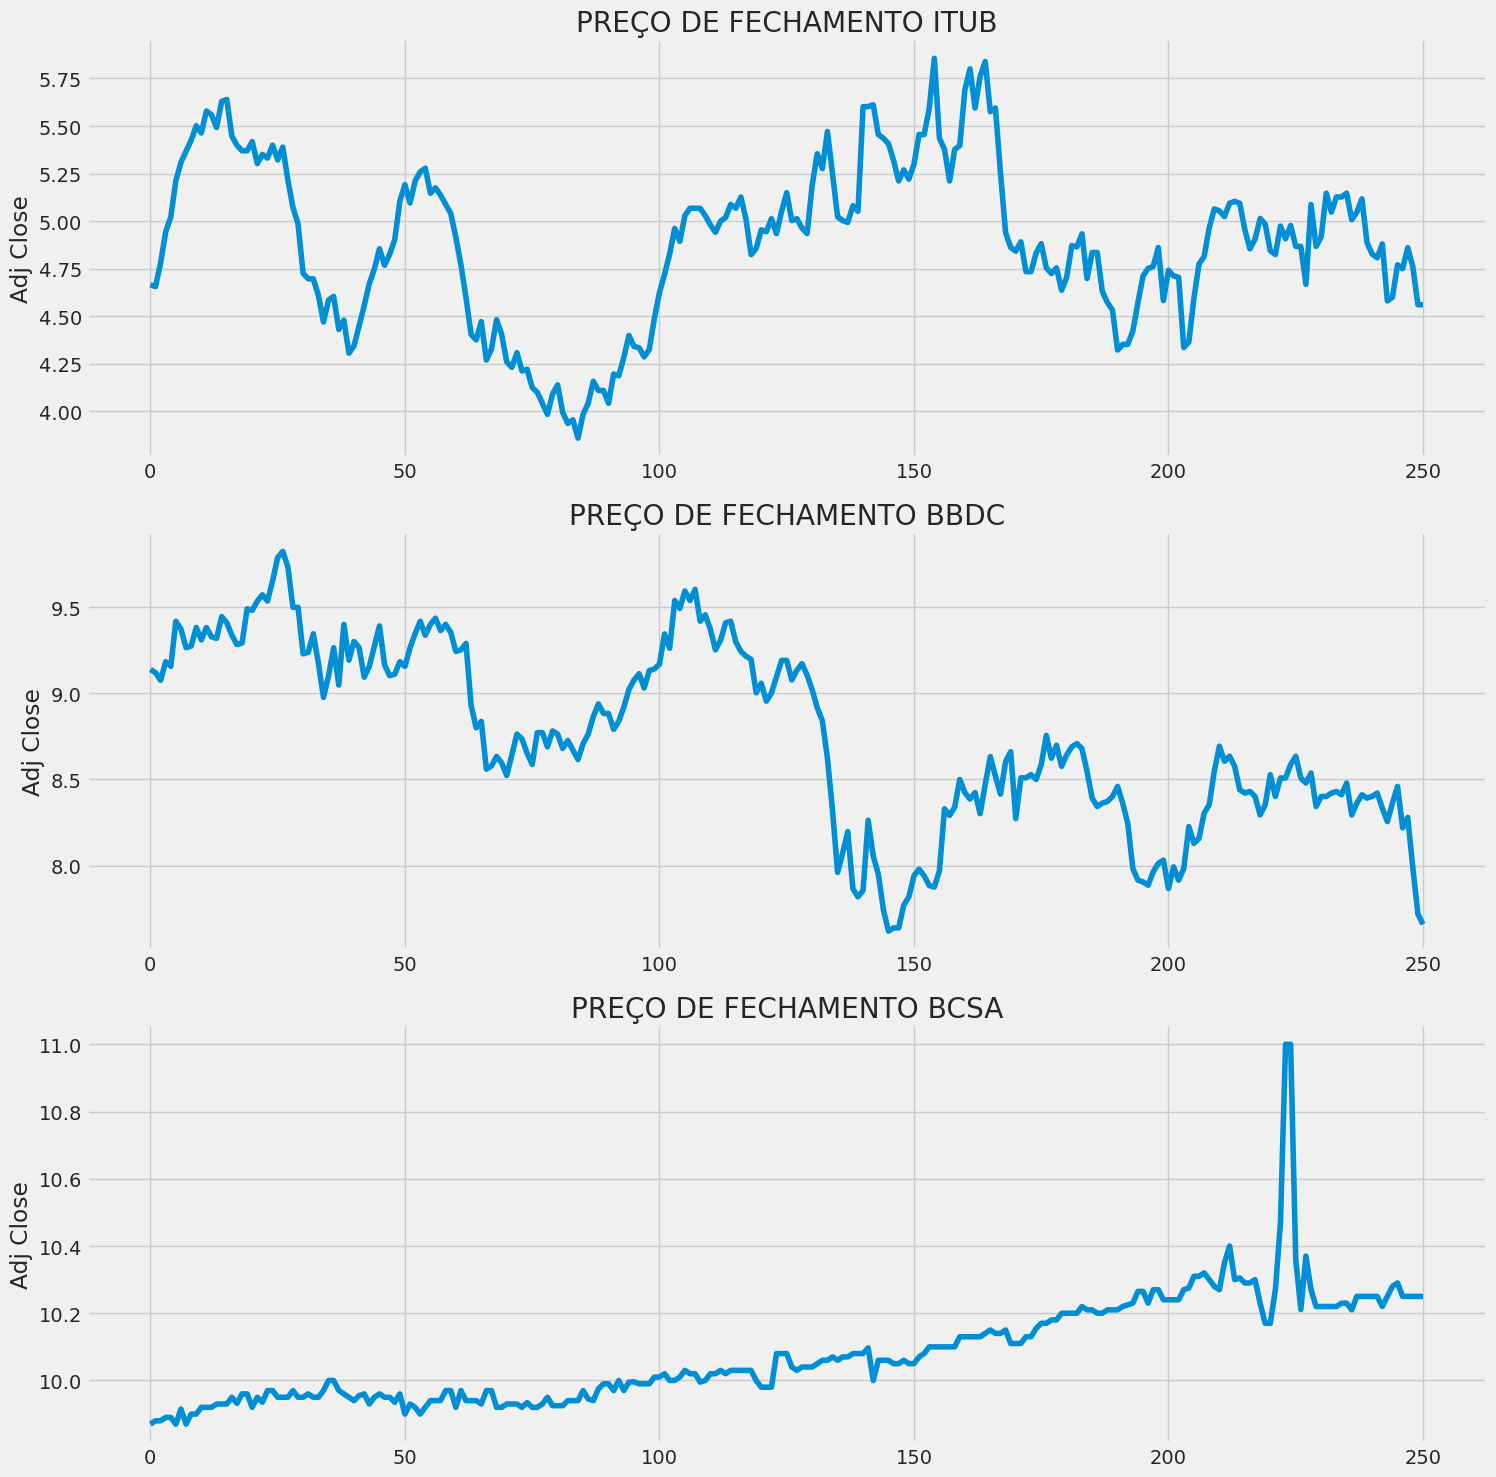

In [14]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=1.75, bottom=1.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3,1,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'PREÇO DE FECHAMENTO {bank_list[i - 1]}')
    
plt.tight_layout()

Podemos observar que o banco Santander, foi o que mais chamou atenção pelo pico que teve entre janeiro e março de 2023.

**Agora visualizando o volume de ações sendo negociadas a cada dia**

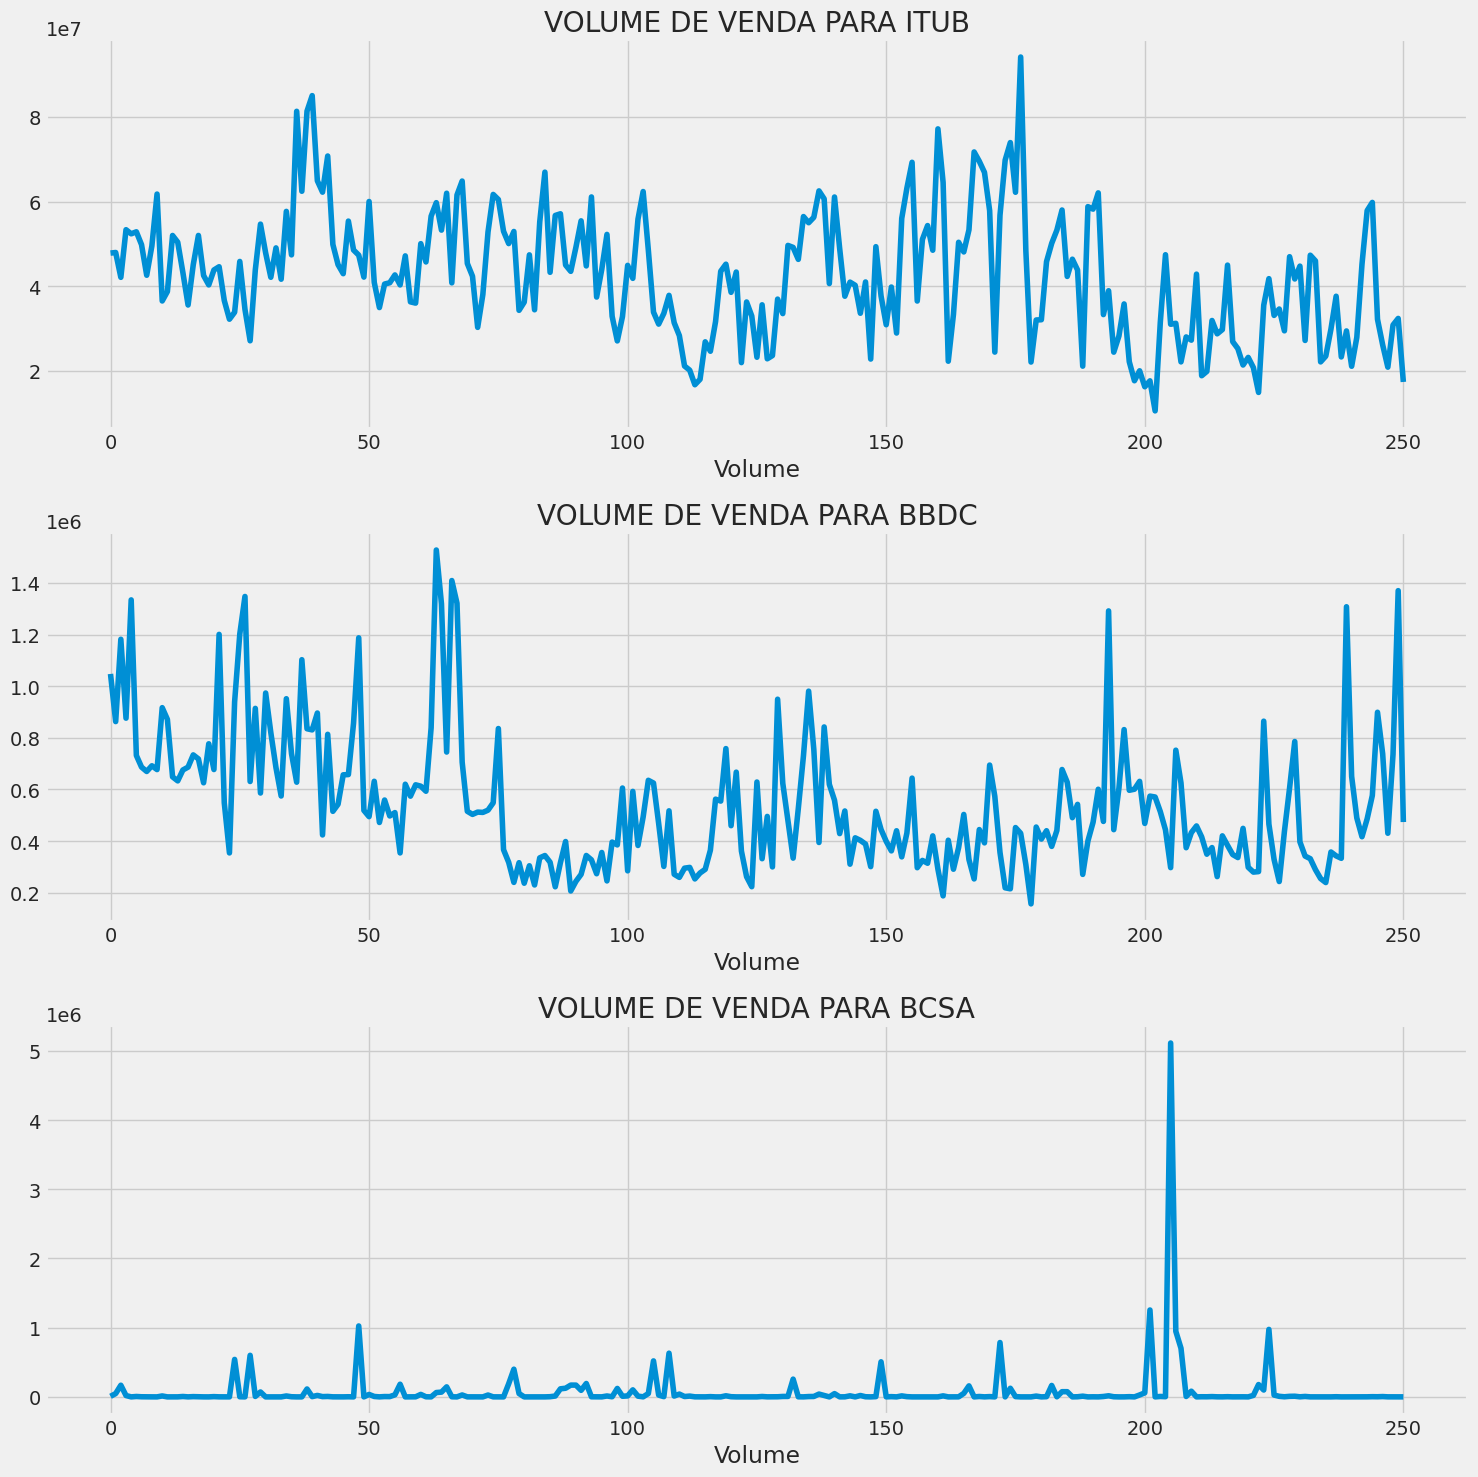

In [15]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=1.75, bottom=1.5)

for i, company in enumerate(company_list, 1):
    plt.subplot(3,1,i)
    company['Volume'].plot()
    plt.xlabel('Volume')
    plt.ylabel(None)
    plt.title(f'VOLUME DE VENDA PARA {bank_list[i-1]}')
    
plt.tight_layout()

Observando o volume de vendas das ações, podemos notar que o banco Santander não tem um grande volume de negociações diariamente, como é o caso de Itaú e Bradesco.

Agora comparando com o gráfico anterior, a alta dos preços se deu pelo grande volume de negociações realizadas entre janeiro e fevereiro de 2023. Para entender melhor sobre o acontecimento ler a seguinte notícia: https://www.infomoney.com.br/mercados/alem-do-subiu-no-boato-caiu-no-fato-por-que-a-acao-do-santander-brasil-tem-forte-baixa-apesar-do-lucro-surpreender/

# Analisando qual foi a média das ações
Para a média, foi levado em consideração um período de tempo específico, como 10 dias, 20 dias e 60 dias.

In [16]:
mean_day = [10,20,60]

In [17]:
for ma in mean_day:
    for company in company_list:
        column_name = f'Média por {ma} dias'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

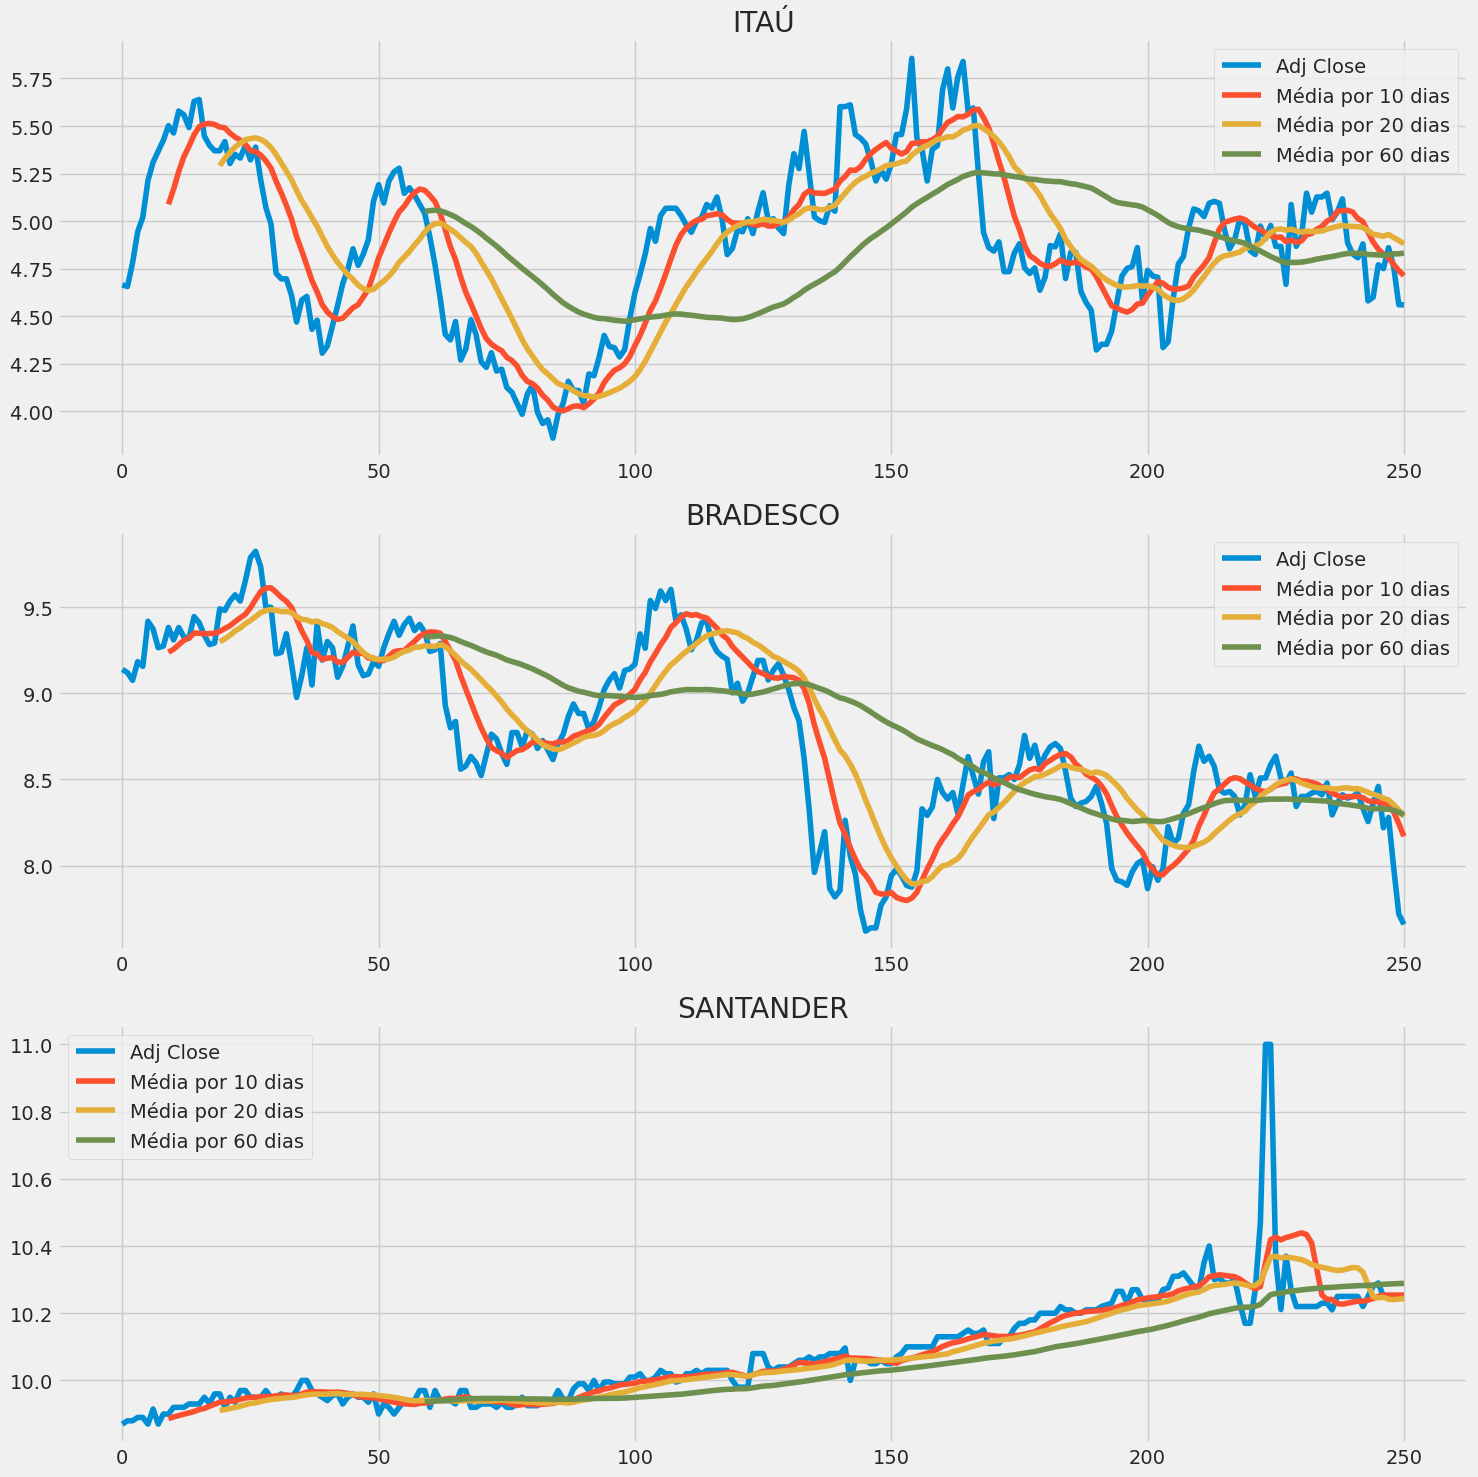

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(15)

ITUB[['Adj Close', 'Média por 10 dias', 'Média por 20 dias', 'Média por 60 dias']].plot(ax=axes[0])
axes[0].set_title('ITAÚ')

BBDC[['Adj Close', 'Média por 10 dias', 'Média por 20 dias', 'Média por 60 dias']].plot(ax=axes[1])
axes[1].set_title('BRADESCO')

BCSA[['Adj Close', 'Média por 10 dias', 'Média por 20 dias', 'Média por 60 dias']].plot(ax=axes[2])
axes[2].set_title('SANTANDER')

fig.tight_layout()

# Gráfico do retorno diário da ação em média

In [19]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

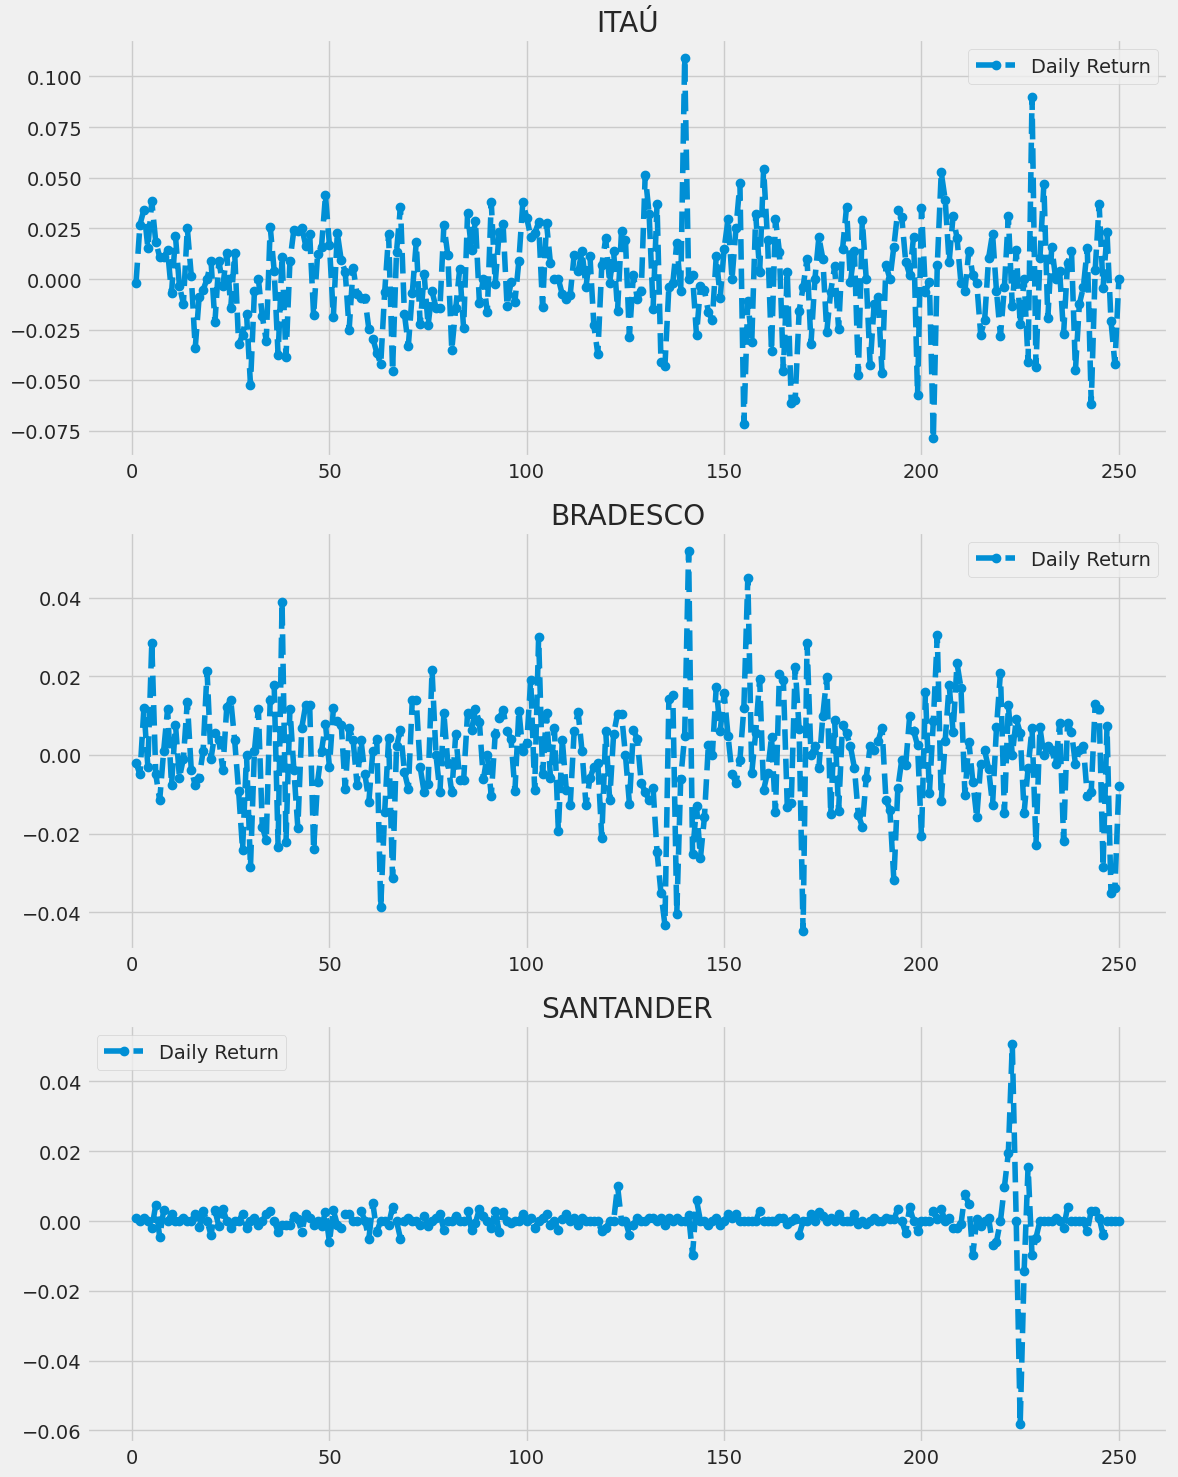

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(12)

ITUB['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('ITAÚ')

BBDC['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('BRADESCO')

BCSA['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('SANTANDER')

fig.tight_layout()

**Agora visualizando o retorno médio usando histograma**

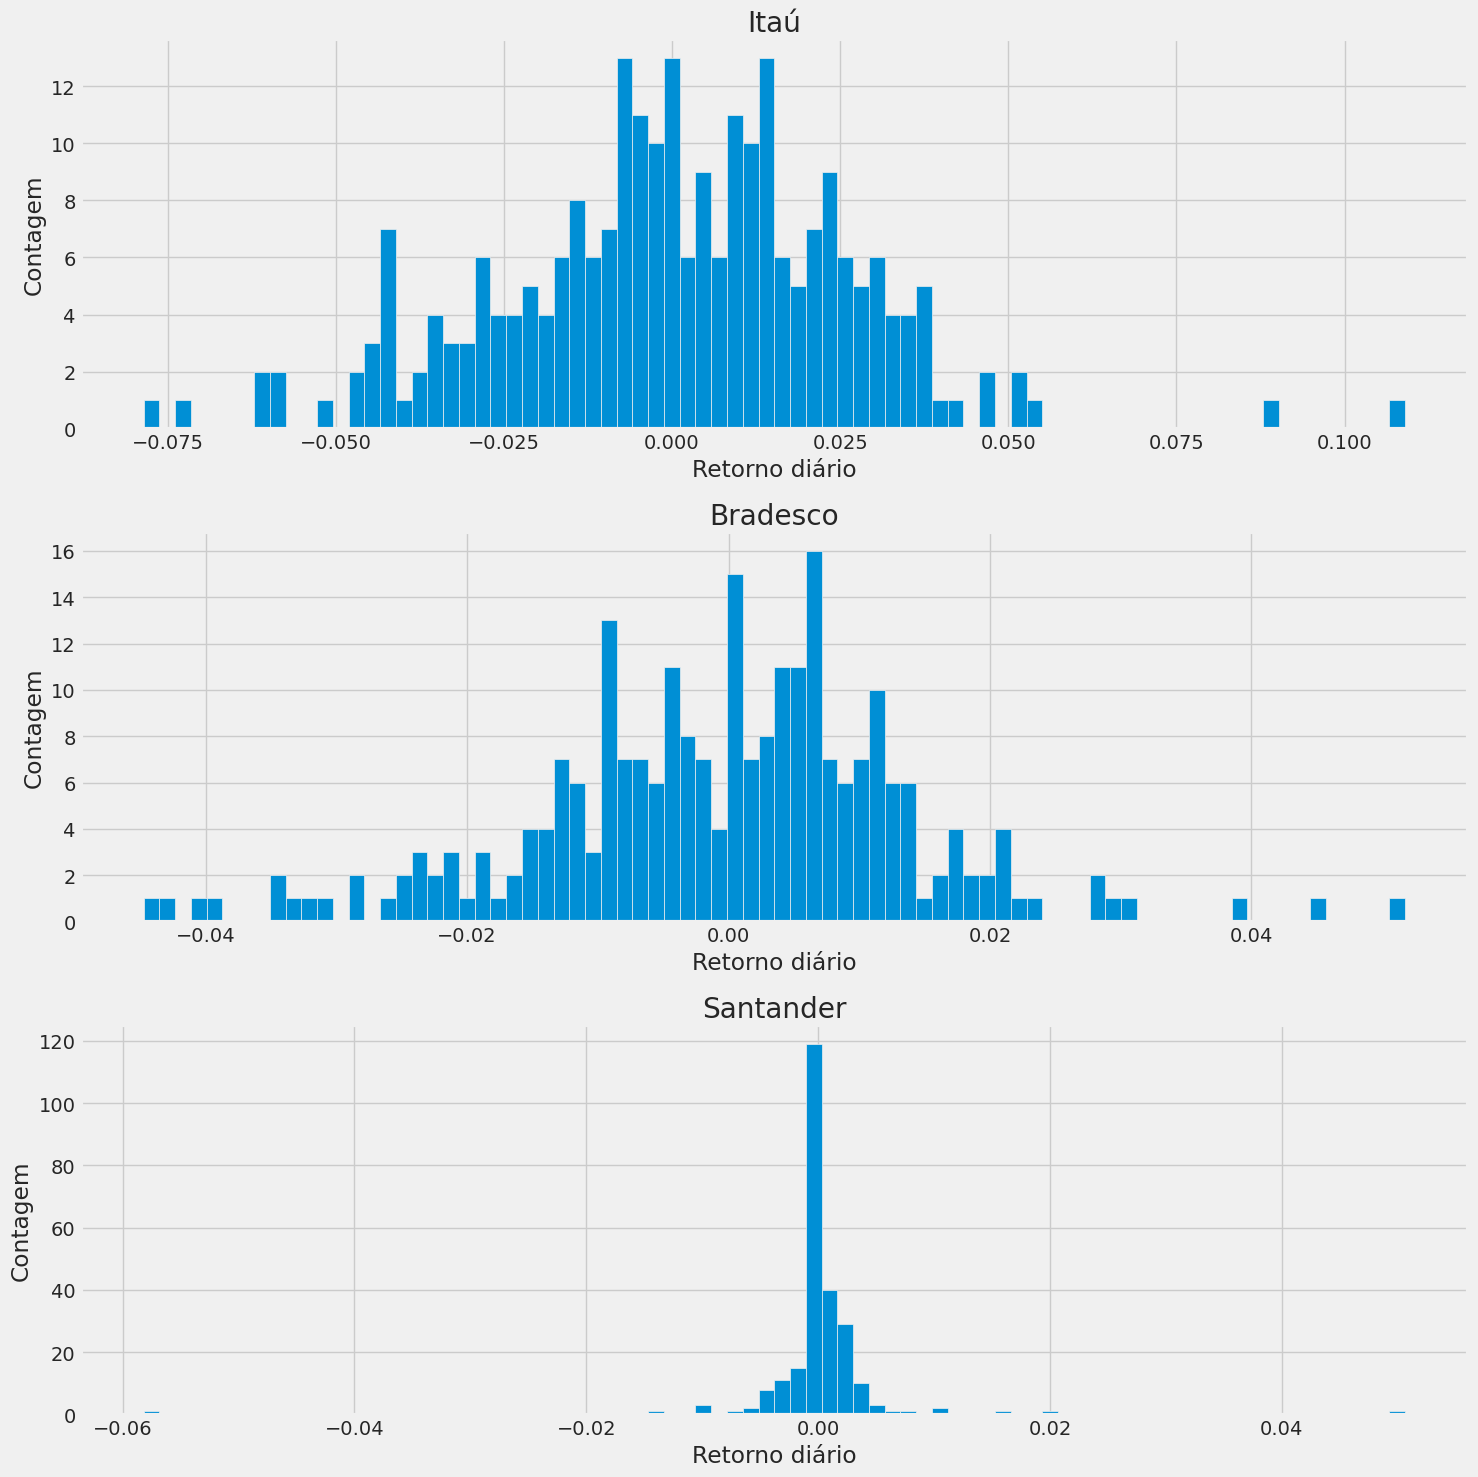

In [21]:
plt.figure(figsize=(15,15))

for i, company in enumerate(company_list, 1):
    plt.subplot(3,1,i)
    company['Daily Return'].hist(bins=80)
    plt.xlabel('Retorno diário')
    plt.ylabel('Contagem')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

Observando os gráficos, o banco Santander é o que se monstrou com o menor retorno no último ano.

**Agora vamos ver a correlação entre o fechamento de cada ação**

In [22]:
# criando um novo dataframe com os preços de fechamento de cada ação
closing_df = pd.DataFrame([ITUB['Adj Close'], BBDC['Adj Close'], BCSA['Adj Close']])
closing_df = closing_df.transpose()

bank_rets = closing_df.pct_change()
bank_rets.columns = ['ITUB','BBDC','BCSA']
bank_rets.head()

,ITUB,BBDC,BCSA
0,NaN,NaN,NaN
1,-0.002062,-0.001972,0.001013
2,0.026859,-0.004941,0.000000
3,0.034205,0.011917,0.001012
4,0.015564,-0.002944,0.000000


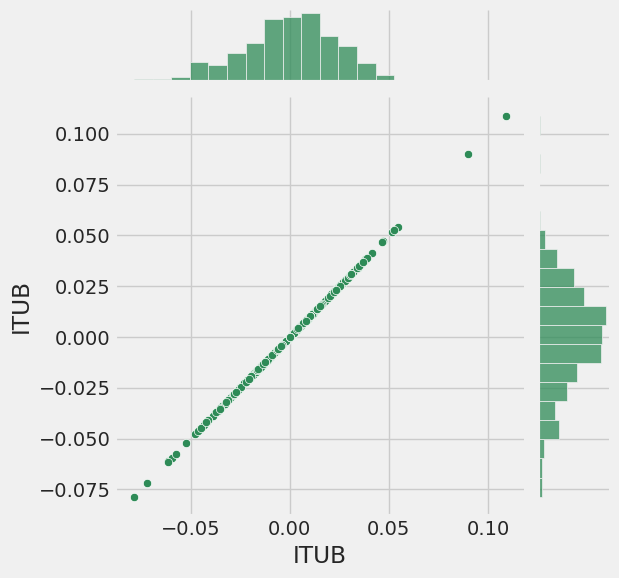

In [23]:
# Comparar uma ação consigo mesmo deve mostrar uma relação perfeitamente linear, usaremos Itaú como base
sns.jointplot(x='ITUB', y='ITUB', data=bank_rets, kind='scatter', color='seagreen')

**Vamos comparar todas as ações entre si**

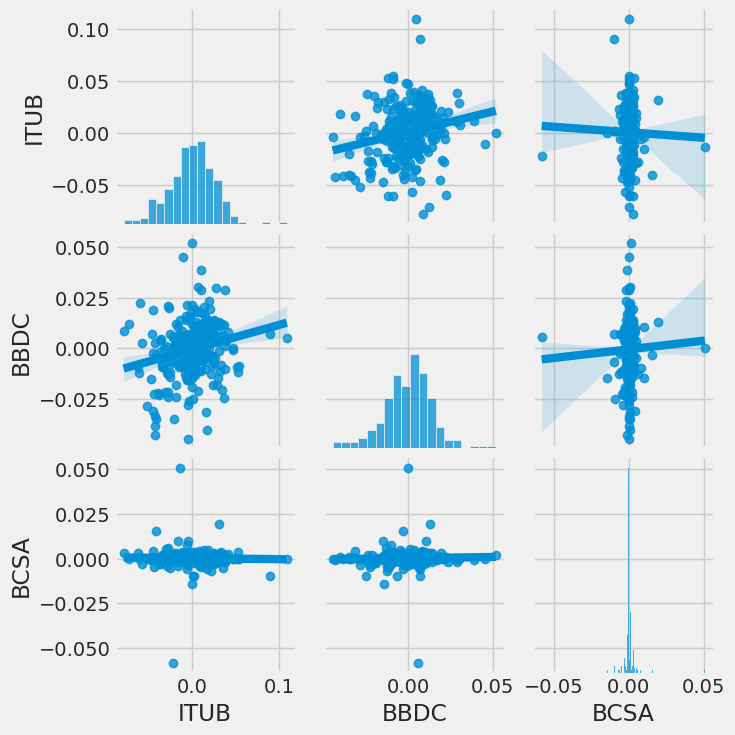

In [24]:
sns.pairplot(bank_rets, kind='reg')

Olhando rapidamente o gráfico nenhuma ação se mostra significativamente correlacionadas 

Vamos observar novamente de outra forma:

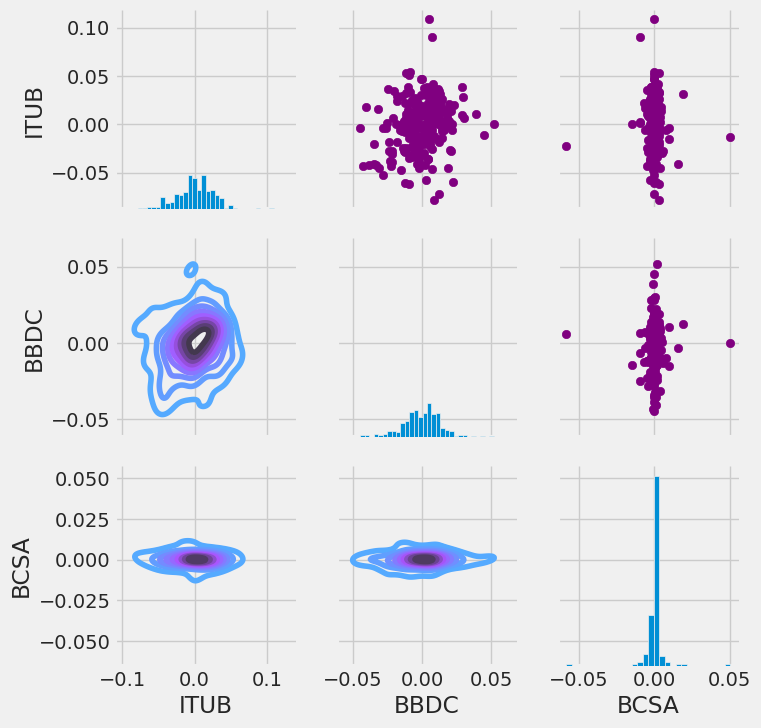

In [25]:
return_fig = sns.PairGrid(bank_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

**Vamos agora observar a correlação entre as ações**

Text(0.5, 1.0, 'Correlação dos preços de fechamento')

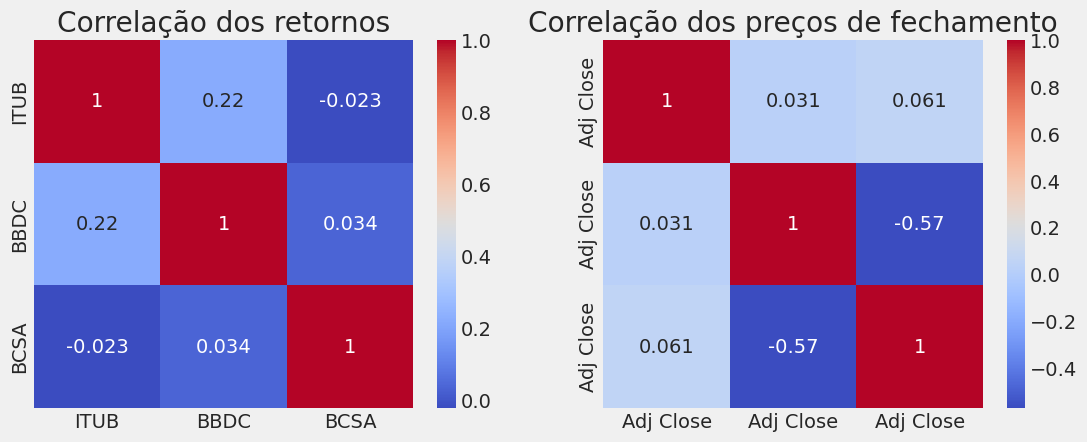

In [26]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação dos retornos')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação dos preços de fechamento')

Podemos observar que as ações são fracamente correlacionadas entre si. O preço de fechamente entre Bradesco e Santander chegam a ser inversamente correlacionadas.

# Quantificando o risco de investir em uma determinada ação

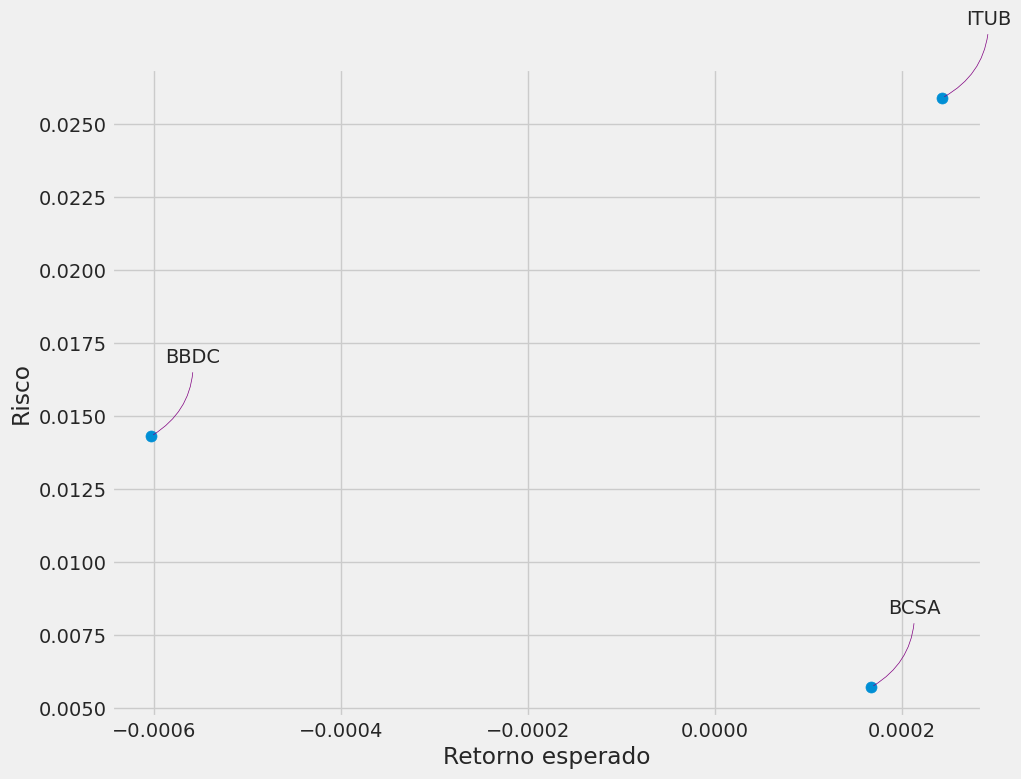

In [27]:
rets = bank_rets.dropna()
area = np.pi * 20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',
                va='bottom', arrowprops=dict(arrowstyle='-', color='purple', 
                                             connectionstyle='arc3,rad=-0.3'))

O itaú se mostra ser o ativo com maior retorno e maior risco entre os bancos observados.

# Prevendo o preço de fechamento das ações

Conforme analisado anteriormente, seguiremos prevendo os valores de itaú por se mostrar a ação com maior retorno

In [28]:
df = pd.read_csv("../input/itub-max/ITUB_max.csv")
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-02-25,1.341837,1.394031,1.341176,1.394031,0.620050,2164443
2002-02-26,1.385772,1.443582,1.375862,1.438626,0.640158,25125703
2002-02-27,1.440608,1.443582,1.415833,1.436975,0.639423,8485222
2002-02-28,1.423761,1.423761,1.417815,1.418806,0.631339,11933195
2002-03-01,1.415503,1.415503,1.369255,1.387424,0.617375,3151308
...,...,...,...,...,...,...
2023-03-06,4.610000,4.820000,4.600000,4.770000,4.770000,32193500
2023-03-07,4.710000,4.760000,4.630000,4.750000,4.750000,26149400
2023-03-08,4.830000,4.930000,4.820000,4.860000,4.860000,20885000


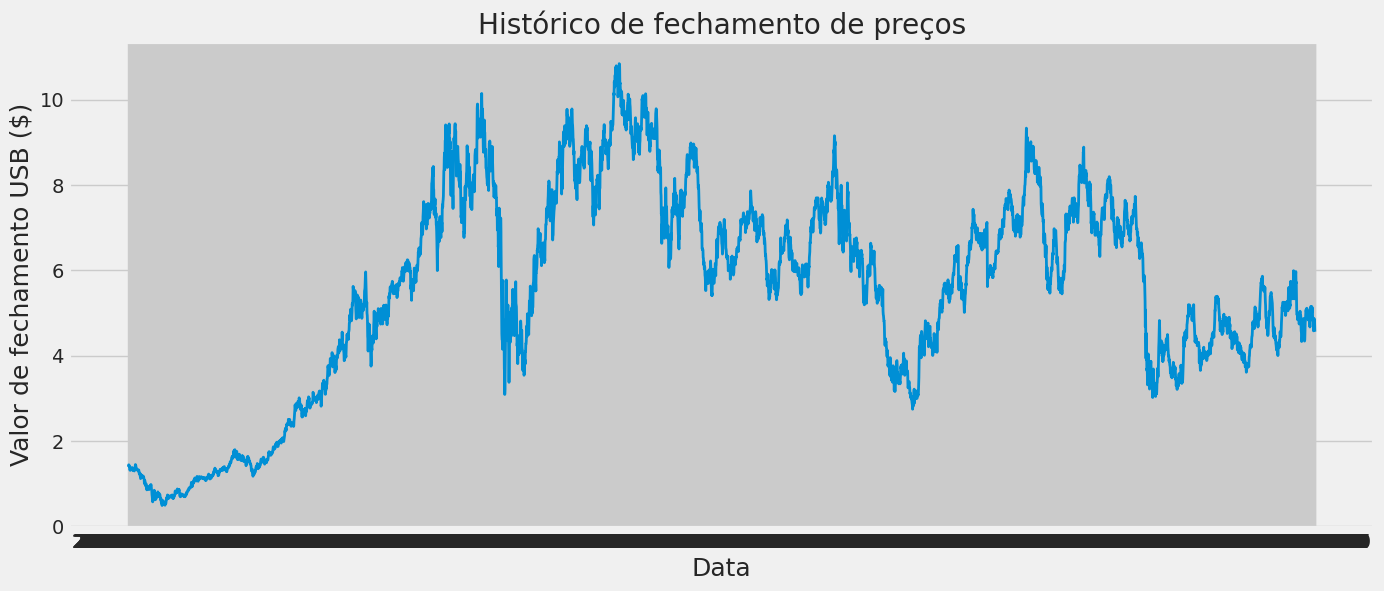

In [29]:
# Gráfico com todos os valores de fechamente de Itaú até agora
plt.figure(figsize=(15,6))
plt.title('Histórico de fechamento de preços')
plt.plot(df['Close'], lw=2)
plt.xlabel('Data', fontsize=18)
plt.ylabel('Valor de fechamento USB ($)', fontsize=18)
plt.show()

In [30]:
# Criando um novo dataframe somente com a coluna 'Close'
data = df.filter(['Close'])
# Convertendo o df para uma array numpy
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95)) # nº de linhas
training_data_len

5034

In [31]:
# Dimensionando a array 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08770538],
       [0.09201084],
       [0.09185144],
       ...,
       [0.42233007],
       [0.4126755 ],
       [0.39336634]])

In [32]:
# Criando um dataset de treinamento 
train_data = scaled_data[0:int(training_data_len), :]
# Dividindo em dois dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# convertendo para array numpy
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.08770538, 0.09201084, 0.09185144, 0.0900973 , 0.0870675 ,
       0.08802427, 0.0810078 , 0.07973214, 0.08164568, 0.08148628,
       0.08065705, 0.08336796, 0.08260245, 0.08355931, 0.08426091,
       0.08579174, 0.08515396, 0.08521768, 0.08037002, 0.07963647,
       0.07877537, 0.08008299, 0.08228356, 0.0810078 , 0.08451608,
       0.08292144, 0.0781375 , 0.08196467, 0.08324033, 0.08339982,
       0.08754588, 0.09264871, 0.09089467, 0.08961891, 0.0845798 ,
       0.08228356, 0.08228356, 0.08228356, 0.08260245, 0.08148628,
       0.0810078 , 0.08084841, 0.07829699, 0.077978  , 0.07877537,
       0.08037002, 0.08021053, 0.07558608, 0.07239679, 0.07112103,
       0.07159942, 0.07351305, 0.06678362, 0.06585871, 0.06091537,
       0.06171264, 0.06569931, 0.06952638, 0.06841022, 0.06751717])]
[0.06777234117735653]

[array([0.08770538, 0.09201084, 0.09185144, 0.0900973 , 0.0870675 ,
       0.08802427, 0.0810078 , 0.07973214, 0.08164568, 0.08148628,
       0.08065705, 0.08336796, 0.08

In [33]:
# Importando biblioteca de predição e preparando modelo de treinamento
from keras.models import Sequential
from keras.layers import Dense, LSTM

#modelo LSTM
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

4974/4974 [==============================] - 155s 31ms/step - loss: 0.0011


In [34]:
# Criando um dataset de teste contendo valores dentro da escala
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
# convertendo para uma array numpy
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# obtendo valores de preços previstos pelo modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# obtendo a raiz do erro quadrático médio
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 1s 30ms/step


0.16244036099436407

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


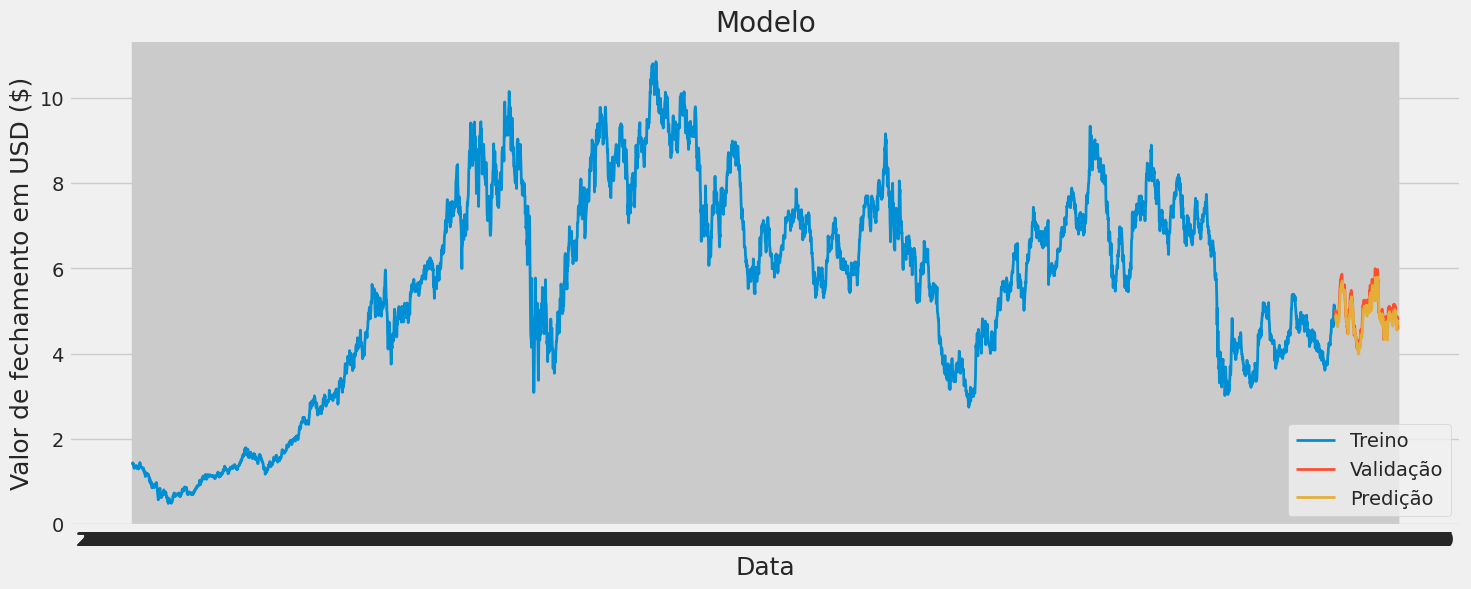

In [35]:
# Visualizando os dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Modelo')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Valor de fechamento em USD ($)', fontsize=18)
plt.plot(train['Close'], lw=2)
plt.plot(valid[['Close','Predictions']], lw=2)
plt.legend(['Treino','Validação','Predição'], loc='lower right')
plt.show()

In [36]:
valid

,Close,Predictions
Date,,
2022-02-22,5.04,4.927085
2022-02-23,5.02,4.928218
2022-02-24,4.87,4.918947
2022-02-25,4.87,4.813012
2022-02-28,4.83,4.786175
...,...,...
2023-03-06,4.77,4.550829
2023-03-07,4.75,4.668963
2023-03-08,4.86,4.695122


Referência: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#6.-Predicting-the-closing-price-stock-price-of-APPLE-inc: